CNN 구조
1. Convolution layer
- 이미지를 classification(분류)하는데필요한 특징(feature)정보를 뽑아냄

1) First convolution layer
- CNN에서 물체의 윤곽을 알아내기 위해 제일 처음 하는 작업은 edge filter를 사용.
- Convolution filter는 모든 layer에서 같은 크기로 고정되어 있음(보통 3x3)
- 처음에는 conv filter 초기값 설정을 통해 무작위로 분포하게 되지만 학습을 통해 edge filter로 만들어 짐.

2) Pooling layer

- convolution layer(Conv) 사이에 Pooling layer(pool)가 사이사이에 배치하고 있음.

- Pooling layer dml 역할
: Pooling 연산 - convolution filter를 거친 결과로 얻은 각각의 feature map에서 특정 영역을 형성해 해당 영역 내에서 가장 큰 값을 도출하게 됨. (max pooling)

- Max pooling
: 특정영역에서 가장 큰 값을 꺼내어 씀.
pooling 할 때 주위의 영역중 가장 큰 값을 뽑기 때문.
pooling 연산을 통해 형태는 유지하면서 기존의 이미지 크기를 작게 만들어 줌(down sampling)

- down sampling
: 더 추상적인 정보를 볼 수 있는 conv filter를 가질 수 있도록

- layer가 깊어지면 깊어질 수록 더 추상적 특징(abstract feature)을 추출할 수 있게 됨.

3) FC layer
- 물체와 유사한 feature map을 통해 classification(분류)하게 됨. 이 때 사용.
- FC layer는 기존의 Deep Neural Network(DNN;MLP)
- 앞에서 convolution filter를 통해 시각정보를 최대한 보존해 오면서 마지막 feature map들을 일렬로 늘린 후, 이들을 DNN과 같이 입력차원으로 받아들여서 하나의 hidden layer를 거쳐 classification(분류) 문제를 해결하게 됨.

- CNN 구조 - 
1. Convolution layer
1) First convolution layer
2) Pooling layer
- pooling layer dml 
- max pooling
- down sampling
3) FC layer


2. 



Libraries

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [3]:
!pip install timm

     |████████████████████████████████| 296kB 19.7MB/s 


In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import random
%matplotlib inline

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/sample_submission.csv')

In [6]:
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [7]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import timm
import torch
from torch import nn 
import torch.nn.functional as F 

# import engine
# from dataset import ShopeeDataset
# from custom_scheduler import ShopeeScheduler
# from augmentations import get_train_transforms

In [8]:
DATA_PATH = '/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching'
# DATA_PATH = '../input/shopee-product-matching/'
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [9]:
train = pd.read_csv(DATA_PATH + '/train.csv')
train['image'] = DATA_PATH + '/train_images/' + train['image']
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,/content/drive/MyDrive/Machine Learning Colab/...,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,/content/drive/MyDrive/Machine Learning Colab/...,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,/content/drive/MyDrive/Machine Learning Colab/...,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,/content/drive/MyDrive/Machine Learning Colab/...,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,/content/drive/MyDrive/Machine Learning Colab/...,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [10]:
# train = pd.read_csv(DATA_PATH + 'train.csv')
# train['image'] = DATA_PATH + 'train_images/' + train['image']
# train.head()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib 의 의미 = 도표와 같은 그림,소리,애니메이션과 같은 결과물들을 Rich output 이라 함. 
#IPython 에서 제공하는 Rich output 에 대한 표현방식
# https://korbillgates.tistory.com/85

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


Load Datasets

In [12]:
# CSV Files
train = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/sample_submission.csv')

In [9]:
# # CSV Files - kaggle
# train = pd.read_csv('../input/shopee-product-matching/train.csv')
# test = pd.read_csv('../input/shopee-product-matching/test.csv')
# sample = pd.read_csv('../input/shopee-product-matching/sample_submission.csv')

In [13]:
# Image Files
train_jpg_directory = '/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train_images'
test_jpg_directory = '/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/test_images'

In [11]:
# # Image Files - kaggle
# train_jpg_directory = '../input/shopee-product-matching/train_images'
# test_jpg_directory = '../input/shopee-product-matching/test_images'

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [17]:
tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
train['target'] = train.label_group.map(tmp)
train.head()

,posting_id,image,image_phash,title,label_group,target
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,"[train_129225211, train_2278313361]"
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,"[train_3386243561, train_3423213080]"
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,"[train_2288590299, train_3803689425]"
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,"[train_2406599165, train_3342059966]"
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,"[train_3369186413, train_921438619]"


In [15]:
# def getImagePaths(path):
#     """
#     Function to Combine Directory Path with individual Image Paths
    
#     parameters: path(string) - Path of directory
#     returns: image_names(string) - Full Image Path
#     """
#     image_names = []
#     for dirname, _, filenames in os.walk(path):
#         for filename in filenames:
#             fullpath = os.path.join(dirname, filename)
#             image_names.append(fullpath)
#     return image_names

In [ ]:
# #Get complete image paths for train and test datasets
# train_images_path = getImagePaths(train_jpg_directory)
# test_images_path = getImagePaths(test_jpg_directory)

Analyzing

In [18]:
# label_group에 있는 label의 개수
len(train.label_group.unique())

11014

In [19]:
# 각 label group에 있는 제품 개수
train_label = train.groupby('label_group').posting_id.count().sort_values(ascending=False)
train_label

label_group
159351600     51
3627744656    51
562358068     51
3113678103    51
994676122     51
              ..
1932824351     2
3381497963     2
1934657835     2
3381177724     2
1471548468     2
Name: posting_id, Length: 11014, dtype: int64

In [20]:
pd.cut(train_label, bins=[0, 10, 20, 30, 40, 51]).value_counts()

(0, 10]     10781
(10, 20]      181
(20, 30]       23
(30, 40]       17
(40, 51]       12
Name: posting_id, dtype: int64

Check whether the pictures are similar in each label_group

In [21]:
def findByLabel(label_group_idx, figscale=2):
    train_a = train[train.label_group == label_group_idx].reset_index()
    count = len(train_a)
    showImgNumber = count
    if count > 5:
        col = 5
        row = int(np.ceil(count/col))  
    else:
        row = 1
        col = count
    fig, ax = plt.subplots(row, col, figsize=(col*figscale, row*figscale))
    
    if row == 1:
        for j in range(col):
            if showImgNumber == 0: break
            ax[j].imshow(cv2.imread(train_a.image[showImgNumber-1]))
            ax[j].set_xticks([])
            ax[j].set_yticks([])
            showImgNumber-=1
    else:
        for i in range(row):
            for j in range(col):
                if showImgNumber == 0: break
                ax[i, j].imshow(cv2.imread(train_a.image[showImgNumber-1]))
                ax[i, j].set_xticks([])
                ax[i, j].set_yticks([])
                
                showImgNumber-=1
    fig.text(0.1, 0.95, 'label_group: {}'.format(label_group_idx))
    return train_a

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
 5   target       34250 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [24]:
from keras.utils import to_categorical

In [53]:
# train_images = '/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train_images'
# test_images = '/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/test_images'

# # Display the first image in training data

# plt.subplot(121)
# plt.imshow(train_images[0,:,:], cmap='gray')
# plt.title("Ground Truth : {}".format(train_labels[0]))

# # Find the shape of input images and create the variable input_shape

# nRows,nCols,nDims = train_images.shape[1:]
# train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
# test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
# input_shape = (nRows, nCols, nDims)


Config and Directories

In [25]:
# DATA_DIR = '../input/shopee-product-matching/train_images'
# TRAIN_CSV = '../input/utils-shopee/folds.csv'
MODEL_PATH = './'


class CFG:
    seed = 54
    img_size = 512
    classes = 11014
    scale = 30
    margin = 0.5
    fc_dim = 512
    epochs = 15
    batch_size = 32
    num_workers = 8
    model_name = 'tf_efficientnet_b4'
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    scheduler_params = {
        "lr_start": 1e-5,
        "lr_max": 1e-5 * batch_size,     # 1e-5 * 32 (if batch_size(=32) is different then)
        "lr_min": 1e-6,
        "lr_ramp_ep": 5,
        "lr_sus_ep": 0,
        "lr_decay": 0.8,
    }

Create Model

nn module
- PyTorch의 autograd 기능 : 복잡한 연산자를 정의하고 유도해내는데 편함. 큰 뉴럴 네트워크에서는 구성하는데 어려움이 많음.
- TensorFlow에서는 이러한 어려움을 극복하기 위해 Keras, TensorFlow-Slim, TFLearn 등을 사용.
- PyTorch에서는 동일한 기능을 위해 nn module을 구현.

- Pytorch의 nn 라이브러리는 Neural Network의 모든 것을 포괄하는 모든 신경망 모델의 Base Class(모든 신경망 모델은 nn.Module의 subclass)
- nn.Module을 상속한 subclass가 신경망 모델로 사용되기 위해서는 두 메소드를 override 해야함.
1) __init__(self):initialize; 사용하고 싶은 신경망 모델에 사용될 구성품들을 정의 및 초기화 하는 메소드
2) forward(self,x):specify the connections; 이닛에서 정의된 구성품들을 연결하는 메소드.





PyTorch 모델의 기본 구조

PyTorch 모델로 쓰기 위한 조건.
(내장된 모델(nn.Linear등)도 이를 만족.

1. torch.nn.Module을 상속해야 함.
- interitance : 상속;어떤 클래스를 만들 때 다른 클래스의 기능을 그대로 가지고 오는 것.

2. __init()__ 과 foward()를 override 해야 함.
- override :  재정의; torch.nn.Module(부모클래스)에서 정의한 메소드를 자식클래스에서 변경하는것
- __init()__에서는 모델에서 사용될 module(nn.Linear, nn.Conv2d),activation function(nn.functional.relu, nn.functional.sigmoid) 등을 정의.
- forward()에서는 모델에서 실행되어야 하는 계산을 정의.
backward 계산은 backward()를 이용하면 PyTorch가 알아서 해줌. forward만 정의해주면 됨.
input을 넣어서 어떤 계산을 진행해 output이 나올지를 정의해준다고 이해하면 됨.





# https://anweh.tistory.com/21

PyTorch Layer의 종류

1. Linear Layers
- nn.Linear
- nn.Bilinear

2. Convolution layers
- nn.Conv1d, nn.Conv2d, nn.Conv3d
- nn.ConvTransposeld, nn.ConvTranspose2d, nn.ConvTranspose3d
- nn.Unfold, nn.Fold

3. Pooling layers
- nn.MaxPool1d, nn.MaxPool2d, nn.MaxPool3d
- nn.MaxUnpool1d, nn.MaxUnpool2d, nn.MaxUnpool3d
- nn.AvgPool1d, nn.AvgPool2d, nn.AvgPool3d
- nn.FractionalMaxPool2d
- nn.LPPool1d, nn.LPPool2d
- nn.AdaptiveMaxPool1d, nn.AdaptiveMaxPool2d, nn.AdaptiveMaxPool3d
- nn.AdaptiveAvgPool1d, nn.AdaptiveAvgPool2d, nn.AdaptiveAvgPool3d

4. Padding layers
- nn.ReflectionPad1d, nn.ReflectionPad2d
- nn.ReplicationPad1d, nn.ReplicationPad2d, - nn.ReplicationPad3d
- nn.ZeroPad2d
- nn.ConstantPad1d, nn.ConstantPad2d, nn.ConstantPad3d

5. Normalization layers
- nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d
- nn.GroupNorm
- nn.InstanceNorm1d, nn.InstanceNorm2d, nn.InstanceNorm3d
- nn.LayerNorm
- nn.LocalResponseNorm

6. Recurrent layers
- nn.RNN, nn.RNNCell
- nn.LSTM, nn.LSTMCell
- nn.GRU, nn.GRUCell

7. Dropout layers
- nn.Dropout, nn.Dropout2d, nn.Dropout3d
- nn.AlphaDropout

8. Sparse layers
- nn.Embedding
- nn.EmbeddingBag

참고 사이트 
pytorch.org/docs/stable/nn.html#module


In [26]:
# 기존 모듈을 이어붙이는 것보다 더 복잡한 모델을 만들어 사용할 때
# nn.Module을 상속받아 서브 클래스를 만듦.
# forward를 정의해 자신만의 모듈을 만들 수 있음.
# forward 안에는 입력 Variable(self, input, label)을 받아 
# 다른 모듈과 다른 연산을 이용해 출력 Variable을 만드는 역할을 함.

# 참고 사이트 https://dacon.io/competitions/official/235585/codeshare/1796/

class ArcMarginProduct(nn.Module):
    def __init__(self, in_features, out_features, scale=30.0, margin=0.50, easy_margin=False, ls_eps=0.0):
        super(ArcMarginProduct, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.scale = scale
        self.margin = margin
        self.ls_eps = ls_eps  # label smoothing
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)

        self.easy_margin = easy_margin
        self.cos_m = math.cos(margin)
        self.sin_m = math.sin(margin)
        self.th = math.cos(math.pi - margin)
        self.mm = math.sin(math.pi - margin) * margin

# forward 정의
    def forward(self, input, label):
        cosine = F.linear(F.normalize(input), F.normalize(self.weight))
        sine = torch.sqrt(1.0 - torch.pow(cosine, 2))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)
    
        one_hot = torch.zeros(cosine.size(), device='cuda')
        one_hot.scatter_(1, label.view(-1, 1).long(), 1)
        if self.ls_eps > 0:
            one_hot = (1 - self.ls_eps) * one_hot + self.ls_eps / self.out_features

        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.scale
        return output, nn.CrossEntropyLoss()(output,label)

# 모델 생성
class ShopeeModel(nn.Module):

    def __init__(
        self,
        n_classes = CFG.classes,
        model_name = CFG.model_name,
        fc_dim = CFG.fc_dim,
        margin = CFG.margin,
        scale = CFG.scale,
        use_fc = True,
        pretrained = True):

        super(ShopeeModel,self).__init__()
        print('Building Model Backbone for {} model'.format(model_name))

        self.backbone = timm.create_model(model_name, pretrained=pretrained)
        in_features = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Identity()
        self.backbone.global_pool = nn.Identity()
        self.pooling =  nn.AdaptiveAvgPool2d(1)
        self.use_fc = use_fc

        if use_fc:
            self.dropout = nn.Dropout(p=0.1)
            self.classifier = nn.Linear(in_features, fc_dim)
            self.bn = nn.BatchNorm1d(fc_dim)
            self._init_params()
            in_features = fc_dim

        self.final = ArcMarginProduct(
            in_features,
            n_classes,
            scale = scale,
            margin = margin,
            easy_margin = False,
            ls_eps = 0.0
        )

    def _init_params(self):
        nn.init.xavier_normal_(self.classifier.weight)
        nn.init.constant_(self.classifier.bias, 0)
        nn.init.constant_(self.bn.weight, 1)
        nn.init.constant_(self.bn.bias, 0)

    def forward(self, image, label):
        features = self.extract_features(image)
        if self.training:
            logits = self.final(features, label)
            return logits
        else:
            return features

    def extract_features(self, x):
        batch_size = x.shape[0]
        x = self.backbone(x)
        x = self.pooling(x).view(batch_size, -1)

        if self.use_fc and self.training:
            x = self.dropout(x)
            x = self.classifier(x)
            x = self.bn(x)
        return x

Training

In [28]:
def run_training():
    
    df = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train.csv')

    labelencoder= LabelEncoder()
    df['label_group'] = labelencoder.fit_transform(df['label_group'])



    # trainset = ShopeeDataset(df,
    #                          train_images_directory,
    #                          transform = get_train_transforms(img_size = CFG.img_size))

    trainloader = torch.utils.data.DataLoader(
        'train.csv',
        batch_size = CFG.batch_size,
        num_workers = CFG.num_workers,
        pin_memory = True,
        shuffle = True,
        drop_last = True
    )

    model = ShopeeModel()
    model.to(CFG.device)

    optimizer = torch.optim.Adam(model.parameters(),
                                 lr = CFG.scheduler_params['lr_start'])
    # scheduler = ShopeeScheduler(optimizer, **CFG.scheduler_params)

    for epoch in range(CFG.epochs):
        # avg_loss_train = engine.train_fn(model, trainloader, optimizer, scheduler, epoch, CFG.device)
        torch.save(model.state_dict(), MODEL_PATH + 'arcface_512x512_{}.pt'.format(CFG.model_name))
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            # 'scheduler': scheduler.state_dict()
            },
            MODEL_PATH + 'arcface_512x512_{}_checkpoints.pt'.format(CFG.model_name)
        )


In [29]:
run_training()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Building Model Backbone for tf_efficientnet_b4 model


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b4_aa-818f208c.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b4_aa-818f208c.pth


In [30]:
vc = dict(train.label_group.value_counts())
counts = list(set(vc.values()))
print('min = ', min(counts), ", max = ", max(counts), ', all = ', sum(vc.values()))

min =  2 , max =  51 , all =  34250


In [34]:
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout
# from keras.optimizers import RMSprop, Adam, Adadelta
# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input, Flatten, MaxPool1D
# from keras.layers.convolutional import Conv1D
# from keras.layers.merge import concatenate
# from keras.callbacks import CSVLogger
# import numpy as np

# epoch = 100
# batch_size = 100
# test_size = 10000
# adj = np.random.randint(0,high=100, size=(20000, 50, 50))      #(20000, 50, 50)
# features = np.random.randint(0,high=100, size=(20000, 50, 52))    #(20000, 50, 52)
# Prop = np.random.randint(0,high=100, size=(20000,))     #(20000, 1)
# database = np.dstack((adj, features))    #(20000, 50, 102)
# print( " shape of database :", database.shape)

# X_tr, X_te, Y_tr, Y_te = train_test_split(database, Prop, test_size=test_size)
# X_tr_adj, X_tr_features = X_tr[:, :, 0:50], X_tr[:, :, 50:]
# X_te_adj, X_te_features = X_te[:, :, 0:50], X_te[:, :, 50:]

# def create_model():
#     # first input model
#     adj_visible1 = Input(shape=(50, 50))
#     conv11 = Conv1D(16, kernel_size=5, activation='relu')(adj_visible1)
#     pool11 = MaxPool1D(pool_size=2)(conv11)
#     conv12 = Conv1D(8, kernel_size=5, activation='relu')(pool11)
#     pool12 = MaxPool1D(pool_size=2)(conv12)
#     flat1 = Flatten()(pool12)
#     # second input model
#     features_visible2 = Input(shape=(50, 52))
#     conv21 = Conv1D(16, kernel_size=5, activation='relu')(features_visible2)
#     pool21 = MaxPool1D(pool_size=2)(conv21)
#     conv22 = Conv1D(8, kernel_size=5, activation='relu')(pool21)
#     pool22 = MaxPool1D(pool_size=2)(conv22)
#     flat2 = Flatten()(pool22)
#     # merge input models
#     merge = concatenate([flat1, flat2])
#     # interpretation model
#     hidden1 = Dense(128, activation='relu')(merge)
#     hidden2 = Dense(32, activation='relu')(hidden1)
#     output = Dense(1, activation='linear')(hidden2)
#     model = Model(inputs=[adj_visible1, features_visible2], outputs=output)
#     model.compile(loss='mean_squared_error', optimizer=Adam())
#     # summarize layers
#     print(model.summary())
#     return model
# def train_model(batch_size = 100, nb_epoch = 20):
#     model = create_model()
#     # csv_logger = CSVLogger('CNN trial.csv')
#     csv_logger = CSVLogger('train.csv')
#     history = model.fit([X_tr_adj, X_tr_features], Y_tr,
#                         batch_size=batch_size,
#                         epochs=nb_epoch,
#                         verbose=1,
#                         validation_data=([X_te_adj, X_te_features], Y_te),
#                         callbacks=[csv_logger])
#     return model
# train_model(nb_epoch = 10)
 

 shape of database : (20000, 50, 102)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 50, 50)]     0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 50, 52)]     0                                            
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 46, 16)       4016        input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 46, 16)       4176        input_6[0][0]                    
______________________________________________________

In [32]:
# # Scale the data to lie between 0 to 1

# train_data /= 255
# test_data /= 255

# # Change the labels from integer to categorical data

# train_labels_one_hot = to_categorical(train_labels)
# test_labels_one_hot = to_categorical(test_labels)


In [31]:
# # Seqeuntial 모델은 레이어를 선형으로 연결해 구성
# # https://keras.io/ko/getting-started/sequential-model-guide/

# from keras.models import Sequential
# from keras.layers import Dense, Activation

# # Conv2D
# # https://opentutorials.org/module/5268/29788

# def createModel():

#     model = Sequential()

#     # The first two layers with 32 filters of window size 3x3

#     model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(units=6, activation='softmax'))

#     return model


# model1 = createModel()
# batch_size = 256
# epochs = 50

# model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# _ = model1(tf.zeros([1,3]))
# model1.summary()

# # history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
# #                    validation_data=(test_data, test_labels_one_hot))
# # model1.evaluate(test_data, test_labels_one_hot)

# # plt.figure(figsize=[8,6])
# # plt.plot(history.history['loss'],'r',linewidth=3.0)
# # plt.plot(history.history['val_loss'],'b',linewidth=3.0)
# # plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
# # plt.xlabel('Epochs ',fontsize=16)
# # plt.ylabel('Loss',fontsize=16)
# # plt.title('Loss Curves',fontsize=16)

# # plt.figure(figsize=[8,6])
# # plt.plot(history.history['acc'],'r',linewidth=3.0)
# # plt.plot(history.history['val_acc'],'b',linewidth=3.0)
# # plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
# # plt.xlabel('Epochs ',fontsize=16)
# # plt.ylabel('Accuracy',fontsize=16)
# # plt.title('Accuracy Curves',fontsize=16)



In [ ]:
# findByLabel(1163569239)
# plt.show()

In [ ]:
# findByLabel(3627744656)
# plt.show()

In [ ]:
# from keras.utils import to_categorical

# print('Training data shape : ', train_images.shape, train_labels.shape)
# print('Testing data shape : ', test_images.shape, test_labels.shape)

NameError: ignored

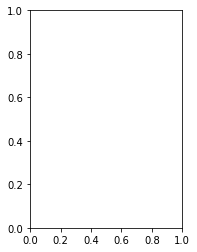

In [31]:
# Display the first image in training data

plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

# Find the shape of input images and create the variable input_shape

nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1

train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


###

Tabular Exploration

In [ ]:
# Dataset Head
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [ ]:
test.head()

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
# Dataset Size
print(f"Training Dataset Shape: {(train.shape)}")
print(f"Test Dataset Shape: {(test.shape)}")


Training Dataset Shape: (34250, 5)
Test Dataset Shape: (3, 4)


In [ ]:
# Column-wise Unique Values
for col in train.columns:
    print(col + ":" + str(len(train[col].unique())))

posting_id:34250
image:32412
image_phash:28735
title:33117
label_group:11014


Number of Images in Each Direcotry

In [ ]:
print(f"Number of train images: {(len(train_images_path))}")
print(f"Number of test images:  {(len(test_images_path))}")

Number of train images: 32432
Number of test images:  3


In [ ]:
def display_multiple_img(images_paths, rows, cols):
    """
    Function to Display Images from Dataset.
    
    parameters: images_path(string) - Paths of Images to be displayed
                rows(int) - No. of Rows in Output
                cols(int) - No. of Columns in Output
    """
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

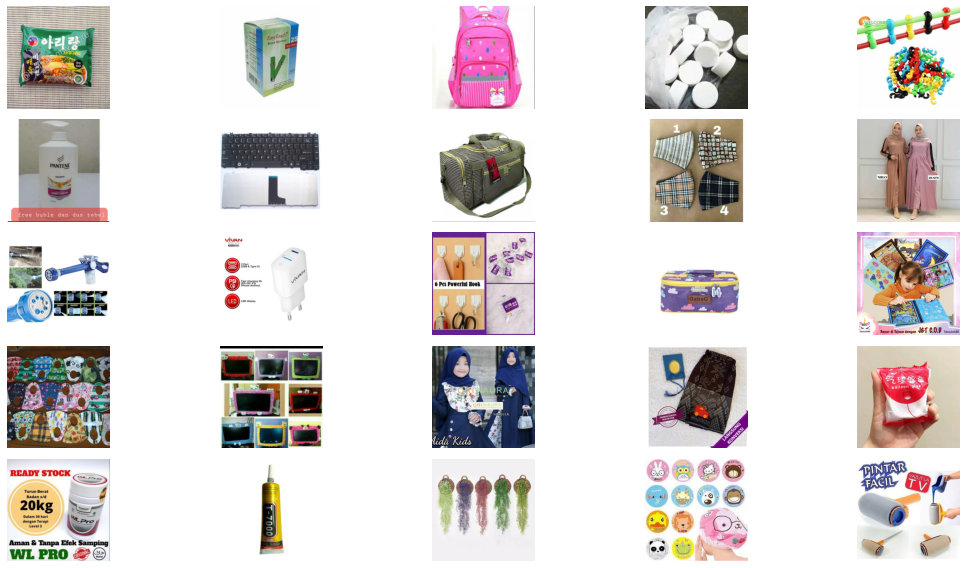

In [ ]:
# Train Image
import cv2
display_multiple_img(train_images_path[100:150], 5, 5)

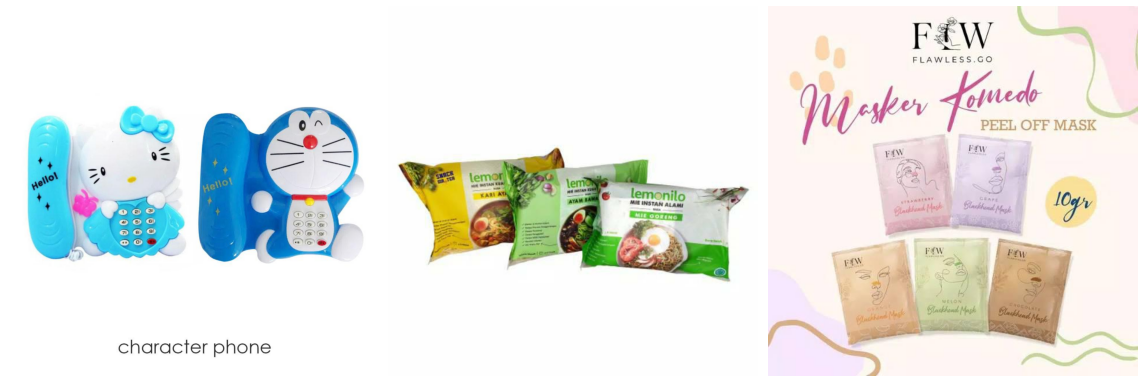

In [ ]:
# Test Images
display_multiple_img(test_images_path, 1, 3)

Image Title Exploration

Label Group Exploration

In [ ]:
# Count of Unique Label Groups
print(f"No. of Unique Label Groups: {(train.label_group.nunique())}")

No. of Unique Label Groups: 11014


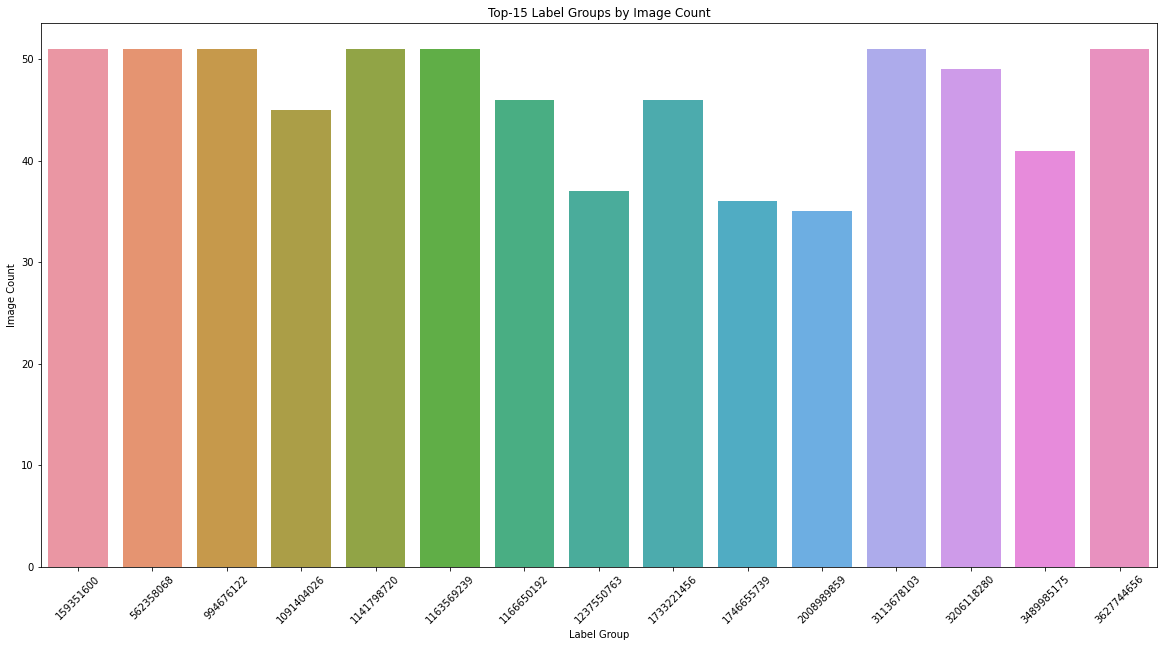

In [ ]:
# Image Label Groups by No.of Images
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

top10_names = train['label_group'].value_counts().index.tolist()[:15]
top10_values = train['label_group'].value_counts().tolist()[:15]

plt.figure(figsize=(20, 10))
ax = plt.plot()
ax = sns.barplot(x=top10_names, y=top10_values)
plt.xticks(rotation=45)
plt.xlabel("Label Group")
plt.ylabel("Image Count")
plt.title("Top-15 Label Groups by Image Count")
plt.show()

Basic Image Exploration

In [ ]:
# Dimensions and 2D Histograms
first = cv2.imread(train_images_path[0])
dims = np.shape(first)
print(dims)

(640, 640, 3)


In [ ]:
np.min(first), np.max(first)

(0, 255)

In [ ]:
pixel_matrix = np.reshape(first, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

(409600, 3)


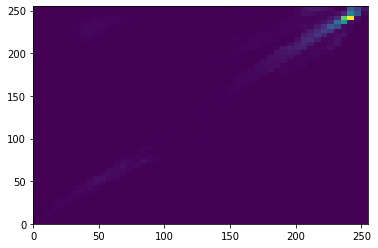

In [ ]:
_ = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))

In [ ]:
fifth = cv2.imread(train_images_path[4])
dims = np.shape(fifth)
pixel_matrix5 = np.reshape(fifth, (dims[0] * dims[1], dims[2]))

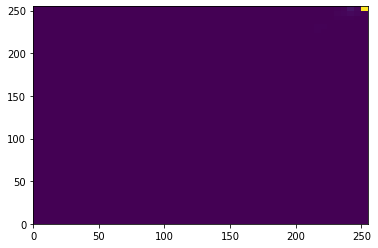

In [ ]:
_ = plt.hist2d(pixel_matrix5[:,1], pixel_matrix5[:,2], bins=(50,50))

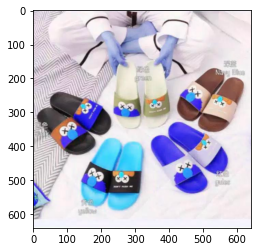

In [ ]:
plt.imshow(first)

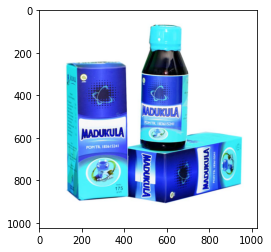

In [ ]:
plt.imshow(fifth)


Intermediate Image Exploration
---



In [ ]:
# Image Dimension

# get image dimensions
def get_dims(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    return h,w

# parallelize
filelist = train_images_path
dimsbag = bag.from_sequence(filelist).map(get_dims)
with diagnostics.ProgressBar():
    dims = dimsbag.compute()
    
dim_df = pd.DataFrame(dims, columns=['height', 'width'])
sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.hvplot.scatter(x='height', y='width', size='count', xlim=(0,1200), ylim=(0,1200), grid=True, xticks=2, 
        yticks=2, height=500, width=600).options(scaling_factor=0.1, line_alpha=1, fill_alpha=0)


NameError: ignored

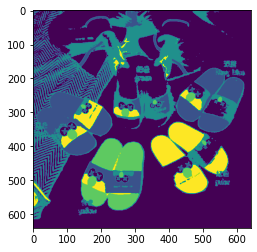

In [ ]:
# K-means Clustering

# simple k means clustering
from sklearn import cluster

kmeans = cluster.KMeans(5)
clustered = kmeans.fit_predict(pixel_matrix)

dims = np.shape(first)
clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)


In [ ]:
ind0, ind1, ind2, ind3 = [np.where(clustered == x)[0] for x in [0, 1, 2, 3]]

Text(0.5, 0, 'Red channel')

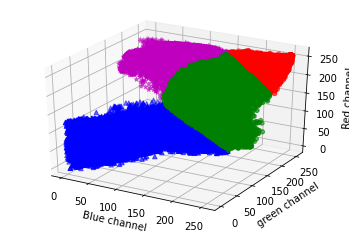

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
             ('b', '^', ind1),
             ('g', '8', ind2),
             ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix[ind, 0]
    ys = pixel_matrix[ind, 1]
    zs = pixel_matrix[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

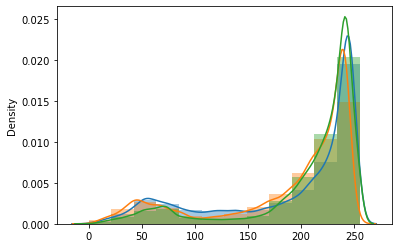

In [ ]:
# quick look at color value histograms for pixel matrix from first image
import seaborn as sns
sns.distplot(pixel_matrix[:,0], bins=12)
sns.distplot(pixel_matrix[:,1], bins=12)
sns.distplot(pixel_matrix[:,2], bins=12)

In [ ]:
# Matching Features

img79_1, img79_2, img79_3, img79_4, img79_5 = [plt.imread(train_images_path[n]) for n in range(78, 83)]

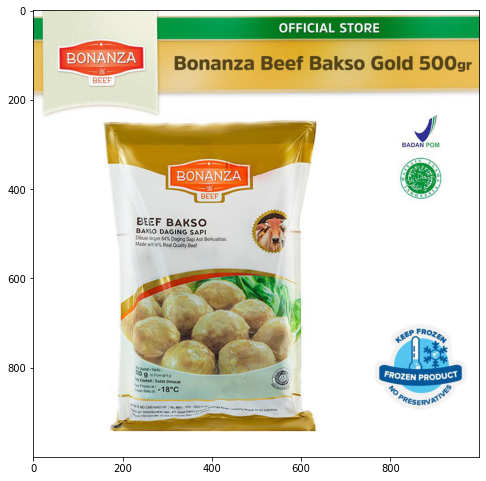

In [ ]:
img_list = (img79_1, img79_2, img79_3, img79_4, img79_5)

plt.figure(figsize=(8,10))
plt.imshow(img_list[0])
plt.show()

In [ ]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [ ]:
msi79_1 = MSImage(img79_1)
print(np.shape(msi79_1.matrix))
print(np.shape(msi79_1.img))

(1000000, 3)
(1000, 1000, 3)


In [ ]:
# Brightness Normalization
def bnormalize(mat):
    """much faster brightness normalization, since it's all vectorized"""
    bnorm = np.zeros_like(mat, dtype=np.float32)
    maxes = np.max(mat, axis=1)
    bnorm = mat / np.vstack((maxes, maxes, maxes)).T
    return bnorm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


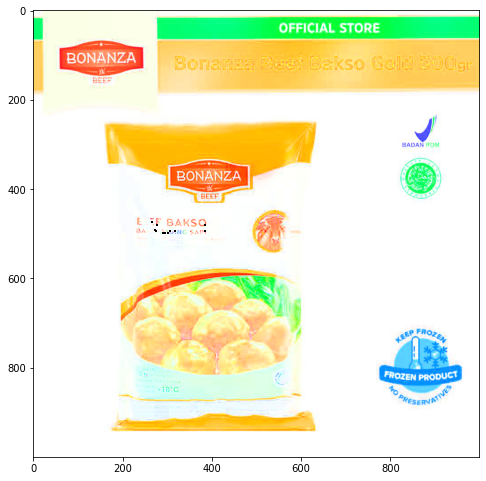

In [ ]:
bnorm = bnormalize(msi79_1.matrix)
bnorm_img = msi79_1.to_matched_img(bnorm)
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img)
plt.show()


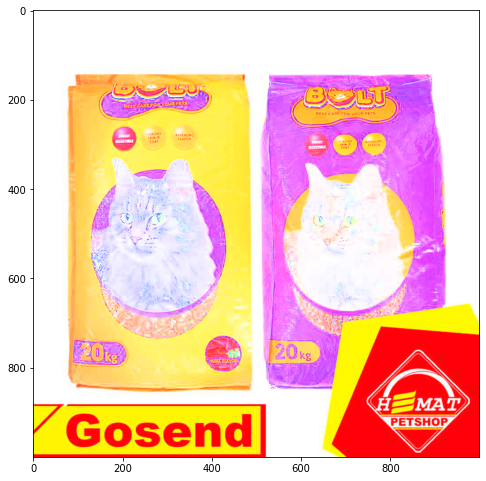

In [ ]:
msi79_2 = MSImage(img79_2)
bnorm79_2 = bnormalize(msi79_2.matrix)
bnorm79_2_img = msi79_2.to_matched_img(bnorm79_2)
plt.figure(figsize=(8,10))
plt.imshow(bnorm79_2_img)
plt.show()

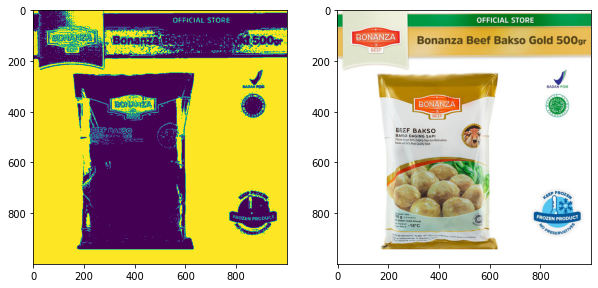

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(img79_1[:,:,0] > 230)
plt.subplot(122)
plt.imshow(img79_1)
plt.show()

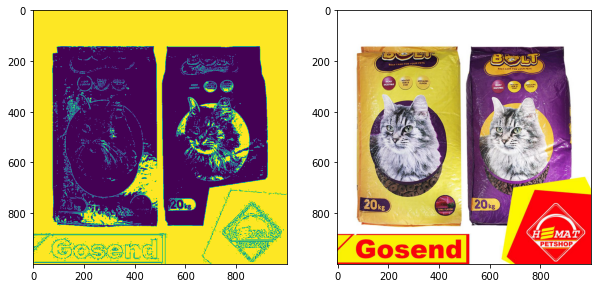

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(img79_2[:,:,0] > 230)
plt.subplot(122)
plt.imshow(img79_2)
plt.show()

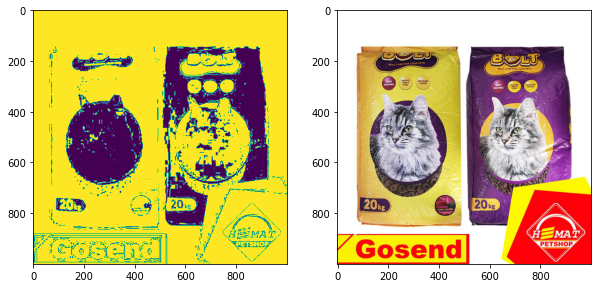

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(bnorm79_2_img[:,:,0] > 0.98)
plt.subplot(122)
plt.imshow(img79_2)
plt.show()


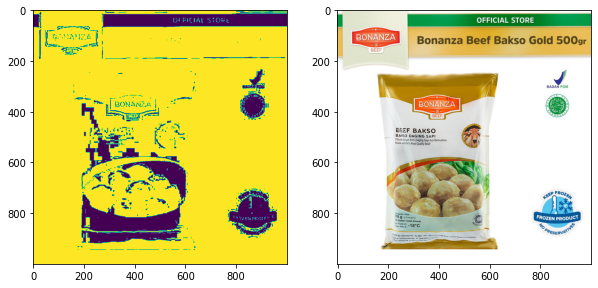

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(bnorm_img[:,:,0] > 0.98)
plt.subplot(122)
plt.imshow(img79_1)
plt.show()

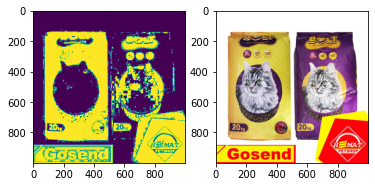

In [ ]:
plt.subplot(121)
plt.imshow((bnorm79_2_img[:,:,0] > 0.9999) & \
           (bnorm79_2_img[:,:,1] < 0.9999) & \
           (bnorm79_2_img[:,:,2] < 0.9999))
plt.subplot(122)
plt.imshow(img79_2)
plt.show()

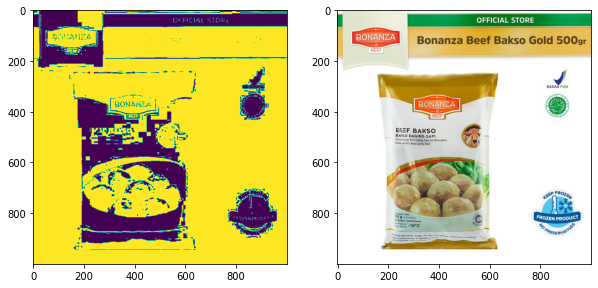

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(bnorm_img[:,:,0] > 0.995)
plt.subplot(122)
plt.imshow(img79_1)
plt.show()

Advanced Image Exploration

In [ ]:
# Rudimentary Transfoms, Edge Detection, Texture
set144 = [plt.imread(train_images_path[n]) for n in (10000, 11000)]

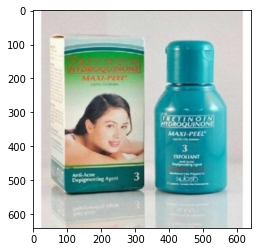

In [ ]:
plt.imshow(set144[0])

In [ ]:
import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel

Sobel Edge Detection

In [ ]:
# a sobel filter is a basic way to get an edge magnitude/gradient image
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(set144[0][:750,:750,2]))

NameError: ignored

In [ ]:
from skimage.filters import sobel_h

# can also apply sobel only across one direction.
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel_h(set144[0][:750,:750,2]), cmap='BuGn')

NameError: ignored

GLCM Textures

In [ ]:
sub = set144[0][:150,:150,2]

NameError: ignored

In [ ]:
def glcm_image(img, measure="dissimilarity"):
    """TODO: allow different window sizes by parameterizing 3, 4. Also should
    parameterize direction vector [1] [0]"""
    texture = np.zeros_like(sub)

    # quadratic looping in python w/o vectorized routine, yuck!
    for i in range(img.shape[0] ):  
        for j in range(sub.shape[1] ):  
          
            # don't calculate at edges
            if (i < 3) or \
               (i > (img.shape[0])) or \
               (j < 3) or \
               (j > (img.shape[0] - 4)):          
                continue  
        
            # calculate glcm matrix for 7 x 7 window, use dissimilarity (can swap in
            # contrast, etc.)
            glcm_window = img[i-3: i+4, j-3 : j+4]  
            glcm = greycomatrix(glcm_window, [1], [0],  symmetric = True, normed = True )   
            texture[i,j] = greycoprops(glcm, measure)  
    return texture

In [ ]:
dissimilarity = glcm_image(sub, "dissimilarity")

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.imshow(dissimilarity, cmap="bone")
plt.subplot(1,2,2)
plt.imshow(sub, cmap="bone")

HSV Transform

In [ ]:
# https://www.kaggle.com/ishandutta/v7-shopee-indepth-eda-one-stop-for-all-your-needs

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     iris_dataset['data'], iris_dataset['target'], random_state=0)

# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X_train, y_train)

# print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test, y_test)))

In [ ]:
# train = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/Shopee/shopee-product-matching/train.csv')
# tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
# train['target'] = train.label_group.map(tmp)
# print('train shape is', train.shape )
# train.head()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

import time
import os

In [ ]:
def display_image(image):

  fig = plt.figure(figsize=(10, 8))

  plt.grid(False)

  plt.axis('off')

  plt.imshow(image)

In [ ]:
def draw_bounding_box_on_image(image, ymin, xmin, ymax,

                               xmax, color, font, thickness=4,

                               display_str_list=()):

  # 이미지에 경계상자 그리기

  draw = ImageDraw.Draw(image)

  im_width, im_height = image.size #이미지 원사이즈

  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,

                                ymin * im_height, ymax * im_height)

  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),

             (left, top)],width=thickness, fill=color)
  
  # 이미지 상단에 글자넣기

  # 만약 박스이미지가 이미지를 초과하면 하단에 글씨를 넣는다

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]



  # 각각의 디스플레이마다 상단과 하단의 여백을 0.05로 설정한다.

  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)



  if top > total_display_str_height:

    text_bottom = top

  else:

    text_bottom = bottom + total_display_str_height



  for display_str in display_str_list[::-1]:

    text_width, text_height = font.getsize(display_str)

    margin = np.ceil(0.05 * text_height)

    draw.rectangle([(left, text_bottom - text_height - 2 * margin),

                    (left + text_width, text_bottom)],

                   fill=color)

    draw.text((left + margin, text_bottom - text_height - margin),

              display_str,fill="black",font=font)

    text_bottom -= text_height - 2 * margin

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" 

detector = hub.load(module_handle).signatures['default']

KeyboardInterrupt: ignored

In [ ]:
def load_img(path):

  img = tf.io.read_file(path)

  img = tf.image.decode_jpeg(img, channels=3)

  return img

In [ ]:
def run_detector(detector, path):

  img = load_img(path)



  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

  start_time = time.time()

  result = detector(converted_img)

  end_time = time.time()


  result = {key:value.numpy() for key,value in result.items()}

  print("이미지에서 찾은 %d개의 객체." % len(result["detection_scores"]))

  print("추론한 시간: ", end_time-start_time)



  image_with_boxes = draw_boxes(

      img.numpy(), result["detection_boxes"],

      result["detection_class_entities"], result["detection_scores"])



  display_image(image_with_boxes)